##   Natural Langunage Processing - Assignment -4

###  Paraphrase Detection (Microsoft Research Paraphrase(MSRP) corpus)

###  Assignment Description : 

In this assignment, you would develop a deep learning models for paraphrase detection. Two documents are considered paraphrases when they convey the same meaning even though they may be written differently. Supervised paraphrase detection takes as input the two documents and outputs a label of 1 or 0 depending on whether they are paraphrases or not. 
Download the Microsoft Research Paraphrase (MSRP) corpus and study its description. Represent each document in the pair as a sequence of word embeddings. Limit the document length to the first 20 words. If a document is longer pad with zeros, and if a document is shorter truncate it. Use GloVe embeddings of size 300. 
Train the following deep learning models on the training set and give performance results (accuracy, precision, recall, and F1-score) on the test set. Use Keras as front end with Tensor Flow on the back.
1.	Feedforward network with two hidden layers (300 and 150 units). Use ReLU activations for the hidden layers. 
2.	LSTM network with 300 units followed by a hidden layer containing 150 ReLU units. 
3.	Same as 2, but use a bi directional LSTM network 
Present your results with default settings and with some variations. Discus the impact of the variations you consider.
Submit your report and code. 


In [72]:
# Basic packages
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path


# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [88]:

NB_WORDS = 10000  # Parameter indicating the number of words to put in dictionary
MAX_LEN = 20    #  Maximum number of words in a sequence
GLOVE_DIM = 300  # Number of dimensions of the GloVe word embeddings

In [87]:
# Remove stopwards from given sequence
def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 

In [6]:
dfTrain = pd.read_csv('F:/LUMS/Spring 2019/Natural Language Processing/Assignment/Assignment4/MSRParaphraseCorpus/msr_paraphrase_train.txt', delimiter=r"\t")

dfTrain = dfTrain[['ï»¿label','string1', 'string2']]
dfTrain.string1 = dfTrain.string1.apply(remove_stopwords)#.apply(remove_mentions)
dfTrain.string2 = dfTrain.string2.apply(remove_stopwords)

c:\python\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
dfTest = pd.read_csv('F:/LUMS/Spring 2019/Natural Language Processing/Assignment/Assignment4/MSRParaphraseCorpus/msr_paraphrase_test.txt', delimiter=r"\t")

dfTest = dfTest[['ï»¿label','string1', 'string2']]
dfTest.string1 = dfTest.string1.apply(remove_stopwords)#.apply(remove_mentions)
dfTest.string2 = dfTest.string2.apply(remove_stopwords)

c:\python\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [89]:
dfTrain['string1'] = dfTrain.string1
dfTrain['string2'] = dfTrain.string1

dfTest['string1'] = dfTest.string1
dfTest['string2'] = dfTest.string1

X_train = dfTrain [['string1','string2']]
y_train = dfTrain[['ï»¿label']]
X_test = dfTest [['string1','string2']]
y_test = dfTest[['ï»¿label']]

In [90]:

print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 4076
# Test data samples: 1725


In [161]:
## convert words into numbers (Train Data)

In [13]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")

tk.fit_on_texts(X_train['string1']+X_train['string2'])

X_train_seq1 = tk.texts_to_sequences(X_train['string1'])

X_train_seq2 = tk.texts_to_sequences(X_train['string1'])



In [14]:
word_index = tk.word_index
print('Found %s unique tokens.' % len(word_index))

X_train_seq_trunc1 = pad_sequences(X_train_seq1, maxlen=MAX_LEN)
X_train_seq_trunc2 = pad_sequences(X_train_seq2, maxlen=MAX_LEN)


Found 11858 unique tokens.


In [91]:

data =np.column_stack([X_train_seq_trunc1, X_train_seq_trunc2])

print(data.shape)
print(y_train.shape)

(4076, 40)
(4076, 1)


In [16]:
## convert words into numbers (Test Data)

In [92]:
X_test_seq1 = tk.texts_to_sequences(X_test['string1'])


X_test_seq2 = tk.texts_to_sequences(X_test['string2'])
X_test_seq_trunc1 = pad_sequences(X_test_seq1, maxlen=MAX_LEN)
X_test_seq_trunc2 = pad_sequences(X_test_seq2, maxlen=MAX_LEN)
test_data =np.column_stack([X_test_seq_trunc1, X_test_seq_trunc2])


In [18]:
# seq_lengths = X_train['string1'].apply(lambda x: len(x.split(' ')))
# seq_lengths.describe()

In [19]:
# seq_lengths = X_train['string2'].apply(lambda x: len(x.split(' ')))
# seq_lengths.describe()

In [95]:
glove_file = 'F:/LUMS/Spring 2019/Natural Language Processing/Assignment/Assignment4/glove.6B/glove.6B.' + str(GLOVE_DIM) + 'd.txt'


In [98]:
embeddings_index = {}
f = open(glove_file, encoding="utf8")
for line in f:
    values = line.split(' ')
    word = values[0] 
    coefs = np.asarray(values[1:], dtype='float32') 
    embeddings_index[word] = coefs
f.close()

print('Glove data loaded')

Glove data loaded


In [102]:

EMBEDDING_DIM = embeddings_index.get('a').shape[0]
num_words = min(NB_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in tk.word_index.items():
    if i > 40 : #2*NB_WORDS
        continue
    embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector



#### Part-1 Feedforward network with two hidden layers (300 and 150 units). Use ReLU activations for the hidden layers. 

In [149]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, MaxPooling1D, Dropout, Activation, Embedding

FFmodel = models.Sequential()
FFmodel.add(layers.Embedding(num_words, GLOVE_DIM, input_length=2*MAX_LEN,weights= [embedding_matrix], trainable=False))
FFmodel.add(layers.Flatten())
FFmodel.add(Dense(300, activation='relu'))
FFmodel.add(Dense(150, activation='relu'))
FFmodel.add(Dense(1, activation='sigmoid'))

FFmodel.summary()
#FFmodel.fit(data,y_train, validation_split=0.1, epochs = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 40, 300)           3000300   
_________________________________________________________________
flatten_10 (Flatten)         (None, 12000)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 300)               3600300   
_________________________________________________________________
dense_40 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 151       
Total params: 6,645,901
Trainable params: 3,645,601
Non-trainable params: 3,000,300
_________________________________________________________________


Train on 3464 samples, validate on 612 samples
Epoch 1/10
3464/3464 [==============================] - 1596s 461ms/step - loss: 0.6440 - acc: 0.6729 - val_loss: 0.6258 - val_acc: 0.6895
Epoch 2/10
3464/3464 [==============================] - 1558s 450ms/step - loss: 0.6024 - acc: 0.6729 - val_loss: 0.6261 - val_acc: 0.6895
Epoch 3/10
3464/3464 [==============================] - 1582s 457ms/step - loss: 0.5839 - acc: 0.6729 - val_loss: 0.6303 - val_acc: 0.6895
Epoch 4/10
3464/3464 [==============================] - 1575s 455ms/step - loss: 0.5703 - acc: 0.6729 - val_loss: 0.6352 - val_acc: 0.6895
Epoch 5/10
3464/3464 [==============================] - 1519s 439ms/step - loss: 0.5608 - acc: 0.6729 - val_loss: 0.6527 - val_acc: 0.6895
Epoch 6/10
3464/3464 [==============================] - 1587s 458ms/step - loss: 0.5502 - acc: 0.6729 - val_loss: 0.6711 - val_acc: 0.6895
Epoch 7/10
3464/3464 [==============================] - 1588s 458ms/step - loss: 0.5425 - acc: 0.6729 - val_loss: 0.662

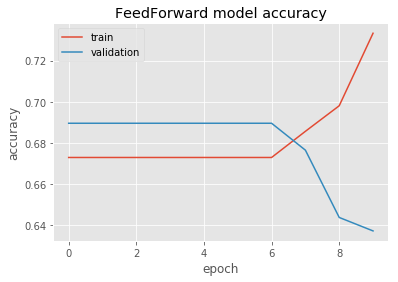

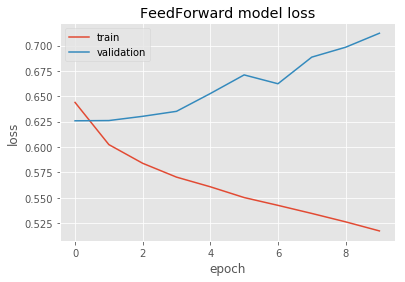

In [113]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


#FFmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

FFmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = FFmodel.fit(data, y_train, validation_split=0.15, epochs = 10)

print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('FeedForward model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig('FeedForwardmodelAccuracy.png')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('FeedForward model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig('FeedForwardmodelLoss.png')
plt.show()

In [118]:
target = to_categorical(np.asarray(y_test))
pred = FFmodel.predict(test_data, batch_size=100, verbose=3)
results = FFmodel.evaluate(test_data, y_test)

print('/n')
print('Test accuracy of Feed forward model: {0:.2f}%'.format(results[1]*100))

1725/1725 [==============================] - 2s 1ms/step
/n
Test accuracy of Feed forward model: 61.22%


In [119]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score,recall_score
from sklearn.metrics import precision_recall_fscore_support

In [120]:
average_precision = average_precision_score(y_test, pred)
recall =recall_score(y_test, pred.round(), average='macro')
f1 = f1_score(pred.round(), y_test)

print('Test accuracy of Feed forward model: {0:.2f}%'.format(results[1]*100))
print('Precision Score for Feed Forward Network : {0:.2f}%' .format(average_precision*100))
print('Recall Score for Feed Forward Network :{0:.2f}%' .format(recall*100))
print('F1 Score for Feed Forward Network :{0:.2f}%' .format(f1*100))

Test accuracy of Feed forward model: 61.22%
Precision Score for Feed Forward Network : 71.64%
Recall Score for Feed Forward Network :52.90%
F1 Score for Feed Forward Network :72.82%


### Part-2 --- LSTM network with 300 units followed by a hidden layer containing 150 ReLU units. 

In [121]:
from keras.models import Sequential

In [150]:
from keras.layers import Dense, Flatten, LSTM, MaxPooling1D, Dropout, Activation,Embedding

LSTMmodel = Sequential()
LSTMmodel.add(Embedding(num_words,  GLOVE_DIM, input_length=2*MAX_LEN, weights= [embedding_matrix], trainable=False))

#LSTMmodel.add(Dropout(0.2))
#LSTMmodel.add(MaxPooling1D(pool_size=4))
LSTMmodel.add(LSTM(300, input_shape=(2*MAX_LEN, 300)))
LSTMmodel.add(Dense(150, activation='relu'))
LSTMmodel.add(Dense(1, activation='sigmoid'))
LSTMmodel.summary()
LSTMmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 40, 300)           3000300   
_________________________________________________________________
lstm_5 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_42 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 151       
Total params: 3,766,801
Trainable params: 766,501
Non-trainable params: 3,000,300
_________________________________________________________________


In [69]:


#LSTMmodel.fit(data, y_train, validation_split=0.1, epochs = 1)

Train on 3668 samples, validate on 408 samples
Epoch 1/10
3668/3668 [==============================] - 765s 209ms/step - loss: 0.6546 - acc: 0.6647 - val_loss: 0.6125 - val_acc: 0.6961
Epoch 2/10
3668/3668 [==============================] - 748s 204ms/step - loss: 0.6192 - acc: 0.6794 - val_loss: 0.6062 - val_acc: 0.7010
Epoch 3/10
3668/3668 [==============================] - 770s 210ms/step - loss: 0.6153 - acc: 0.6865 - val_loss: 0.6042 - val_acc: 0.7108
Epoch 4/10
3668/3668 [==============================] - 746s 203ms/step - loss: 0.6141 - acc: 0.6960 - val_loss: 0.6047 - val_acc: 0.7108
Epoch 5/10
3668/3668 [==============================] - 735s 200ms/step - loss: 0.6127 - acc: 0.6952 - val_loss: 0.6041 - val_acc: 0.7083
Epoch 6/10
3668/3668 [==============================] - 712s 194ms/step - loss: 0.6112 - acc: 0.6957 - val_loss: 0.6039 - val_acc: 0.7059
Epoch 7/10
3668/3668 [==============================] - 715s 195ms/step - loss: 0.6101 - acc: 0.6971 - val_loss: 0.6040 - val

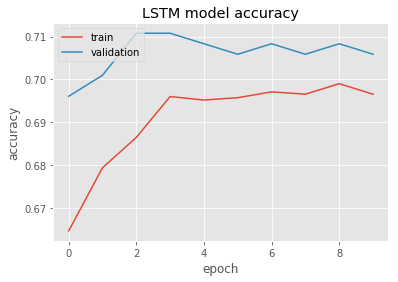

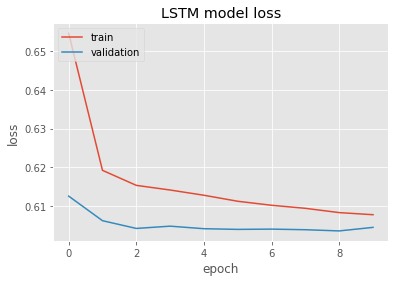

In [123]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#FFmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = LSTMmodel.fit(data, y_train, validation_split=0.1, epochs = 10)

print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [126]:
#target = to_categorical(np.asarray(y_test))
LSTMpred = LSTMmodel.predict(test_data, batch_size=100, verbose=1)
results = LSTMmodel.evaluate(test_data, y_test)

print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

1725/1725 [==============================] - 65s 38ms/step
/n
Test accuracy of word embeddings model: 68.12%


In [127]:
average_precision = average_precision_score(y_test, LSTMpred)
recall =recall_score(y_test, LSTMpred.round(), average='macro')
f1 = f1_score(LSTMpred.round(), y_test)

print('Test accuracy of LSTM model: {0:.2f}%'.format(results[1]*100))
print('Precision Score for LSTM Network : {0:.2f}%' .format(average_precision*100))
print('Recall Score for LSTM Network :{0:.2f}%' .format(recall*100))
print('F1 Score for Feed LSTM Network :{0:.2f}%' .format(f1*100))

Test accuracy of LSTM model: 68.12%
Precision Score for LSTM Network : 71.44%
Recall Score for LSTM Network :54.61%
F1 Score for Feed LSTM Network :79.94%


### Part-3 --- BiLSTM network with 300 units followed by a hidden layer containing 150 ReLU units. 

In [151]:
from keras.layers import Bidirectional
BiLSTMmodel = models.Sequential()
BiLSTMmodel.add(Embedding(num_words,  GLOVE_DIM, input_length=2*MAX_LEN, weights= [embedding_matrix], trainable=False))

BiLSTMmodel.add(Bidirectional(LSTM(300))) #, return_sequences=True

BiLSTMmodel.add((Dense(150, activation='relu')))
BiLSTMmodel.add((Dense(1, activation='sigmoid')))
BiLSTMmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
BiLSTMmodel.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 40, 300)           3000300   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 600)               1442400   
_________________________________________________________________
dense_44 (Dense)             (None, 150)               90150     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 151       
Total params: 4,533,001
Trainable params: 1,532,701
Non-trainable params: 3,000,300
_________________________________________________________________


In [68]:

# print(labels.shape)
# BiLSTMmodel.fit(data, y_train, validation_split=0.1, epochs = 1)

Train on 3586 samples, validate on 490 samples
Epoch 1/10
3586/3586 [==============================] - 1466s 409ms/step - loss: 0.6709 - acc: 0.6665 - val_loss: 0.6323 - val_acc: 0.7020
Epoch 2/10
3586/3586 [==============================] - 1501s 419ms/step - loss: 0.6208 - acc: 0.6924 - val_loss: 0.6123 - val_acc: 0.6898
Epoch 3/10
3586/3586 [==============================] - 1485s 414ms/step - loss: 0.6137 - acc: 0.6913 - val_loss: 0.6113 - val_acc: 0.6918
Epoch 4/10
3586/3586 [==============================] - 1483s 414ms/step - loss: 0.6128 - acc: 0.6874 - val_loss: 0.6075 - val_acc: 0.6980
Epoch 5/10
3586/3586 [==============================] - 1397s 390ms/step - loss: 0.6109 - acc: 0.6896 - val_loss: 0.6072 - val_acc: 0.6939
Epoch 6/10
3586/3586 [==============================] - 1436s 400ms/step - loss: 0.6088 - acc: 0.6935 - val_loss: 0.6075 - val_acc: 0.6918
Epoch 7/10
3586/3586 [==============================] - 1406s 392ms/step - loss: 0.6073 - acc: 0.6935 - val_loss: 0.606

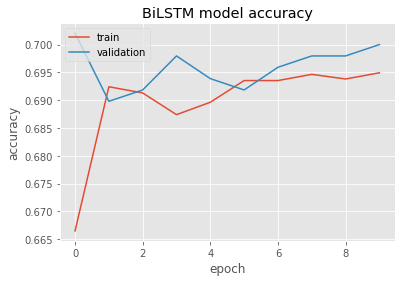

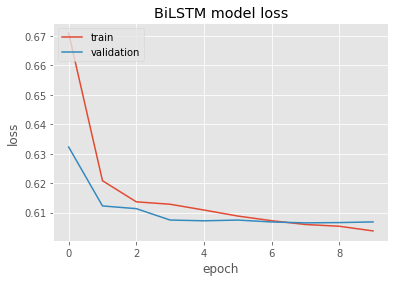

In [129]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
batch_size = 10

#FFmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = BiLSTMmodel.fit(data, y_train, validation_split=0.12, epochs = 10)

print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('BiLSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BiLSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [137]:
#target = to_categorical(np.asarray(y_test))
pred = BiLSTMmodel.predict(test_data, batch_size=8192, verbose=1)
results = BiLSTMmodel.evaluate(test_data, y_test)

print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

1725/1725 [==============================] - 136s 79ms/step
/n
Test accuracy of word embeddings model: 67.65%


In [138]:
average_precision = average_precision_score(y_test, pred)
recall =recall_score(y_test, pred.round(), average='macro')
f1 = f1_score(pred.round(), y_test)

print('Test accuracy of BiLSTM model model: {0:.2f}%'.format(results[1]*100))
print('Precision Score for BiLSTM model  : {0:.2f}%' .format(average_precision*100))
print('Recall Score for BiLSTM model  :{0:.2f}%' .format(recall*100))
print('F1 Score for BiLSTM model  :{0:.2f}%' .format(f1*100))

Test accuracy of BiLSTM model model: 67.65%
Precision Score for BiLSTM model  : 73.15%
Recall Score for BiLSTM model  :54.30%
F1 Score for BiLSTM model  :79.58%


#### LSTM with Dropout and Maxpooling

In [130]:
from keras.layers import Dense, Flatten, LSTM, MaxPooling1D, Dropout, Activation,Embedding

LSTMmodel = Sequential()
LSTMmodel.add(Embedding(num_words,  GLOVE_DIM, input_length=2*MAX_LEN, weights= [embedding_matrix], trainable=False))

LSTMmodel.add(Dropout(0.2))
LSTMmodel.add(MaxPooling1D(pool_size=4))
LSTMmodel.add(LSTM(3, input_shape=(2*MAX_LEN, 300)))
LSTMmodel.add(Dense(2, activation='relu'))
LSTMmodel.add(Dense(1, activation='sigmoid'))
LSTMmodel.summary()
LSTMmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 40, 300)           3000300   
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 300)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 300)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 3)                 3648      
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 3         
Total params: 3,003,959
Trainable params: 3,659
Non-trainable params: 3,000,300
______________________________________________________________

Train on 3464 samples, validate on 612 samples
Epoch 1/1


c:\python\lib\site-packages\theano\tensor\signal\pool.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  yk[[region_slices[i][r[i]] for i in xrange(nd)]])


3464/3464 [==============================] - 10168s 3s/step - loss: 0.6774 - acc: 0.6706 - val_loss: 0.6529 - val_acc: 0.6895
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


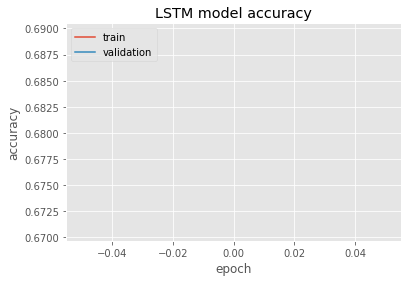

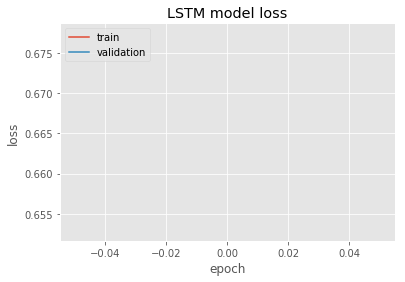

In [134]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#FFmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = LSTMmodel.fit(data, y_train, validation_split=0.15, epochs = 1)

print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [144]:

pred = LSTMmodel.predict(test_data, batch_size=100, verbose=1)
results = LSTMmodel.evaluate(test_data, y_test)

print('/n')
#print('Test accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

/n


In [148]:
average_precision = average_precision_score(y_test, pred)
recall =recall_score(y_test, pred.round(), average='macro')
f1 = f1_score(pred.round(), y_test)

print('Test accuracy of BiLSTM model model: {0:.2f}%'.format(results[1]*100))
print('Precision Score for BiLSTM model  : {0:.2f}%' .format(average_precision*100))
print('Recall Score for BiLSTM model  :{0:.2f}%' .format(recall*100))
print('F1 Score for BiLSTM model  :{0:.2f}%' .format(f1*100))




Test accuracy of BiLSTM model model: 73.19%
Precision Score for BiLSTM model  : 78.25%
Recall Score for BiLSTM model  :55.01%
F1 Score for BiLSTM model  :80.11%
